In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

Loading the dataset then displaying basic information about the dataset

In [37]:
file_name = "dataset.csv"  # Replace with the actual dataset path
try:
    df = pd.read_csv(file_name)
    print(f"Dataset '{file_name}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found. Please ensure it is in the working directory.")
    exit()



print("\nDataset Overview:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset 'dataset.csv' loaded successfully.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker   

In [39]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print(f"\nNon-numeric columns detected: {list(non_numeric_columns)}")
    encoder = LabelEncoder()
    for column in non_numeric_columns:
        df[column] = encoder.fit_transform(df[column])
    print("Non-numeric columns encoded successfully.")

print("\nMissing Values in the Dataset:")
print(df.isnull().sum())



Non-numeric columns detected: ['Patient Id', 'Level']
Non-numeric columns encoded successfully.

Missing Values in the Dataset:
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


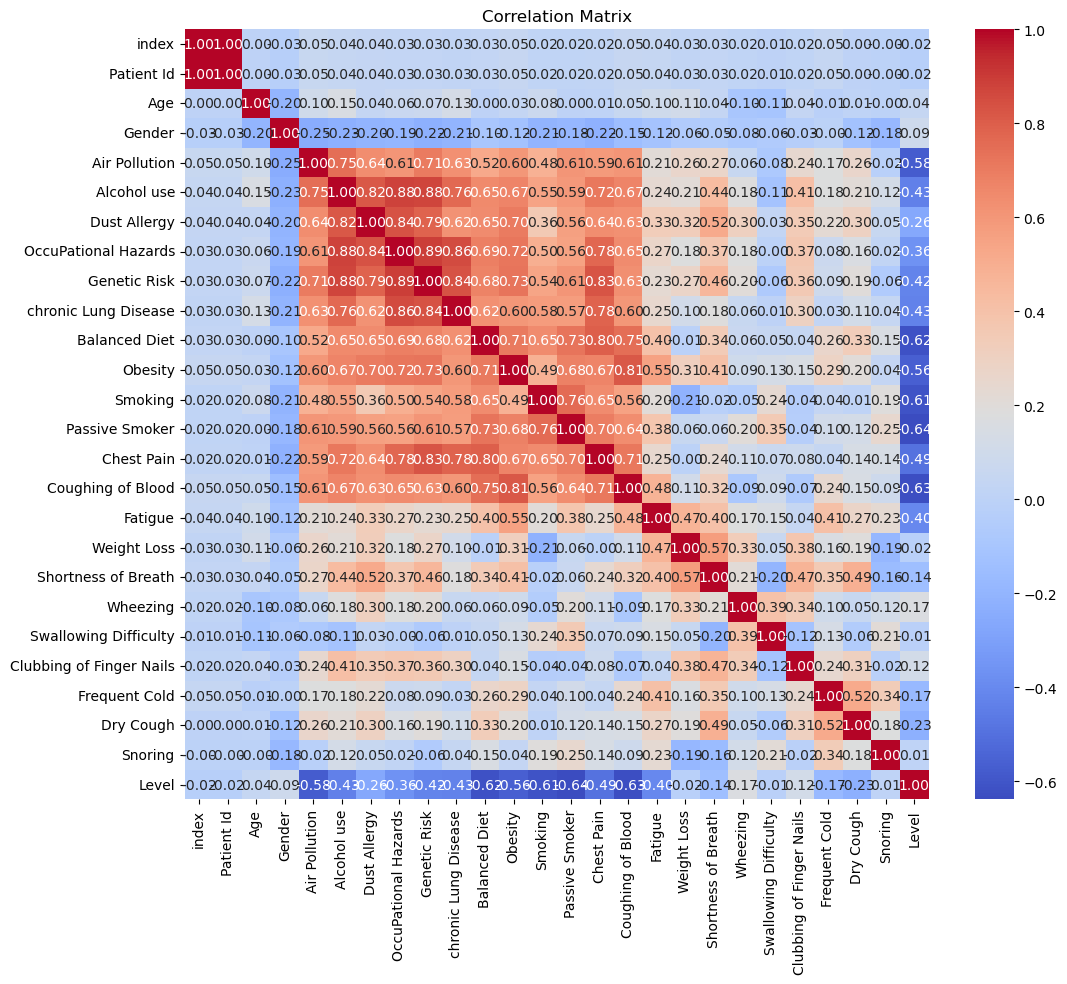


Selected Features Based on Correlation:
['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Dry Cough']

Data Split:
Training Samples: 800, Testing Samples: 200

Linear Regression Model Trained Successfully.

Model Performance:
Mean Squared Error (MSE): 0.17
R-Squared (R²): 0.77


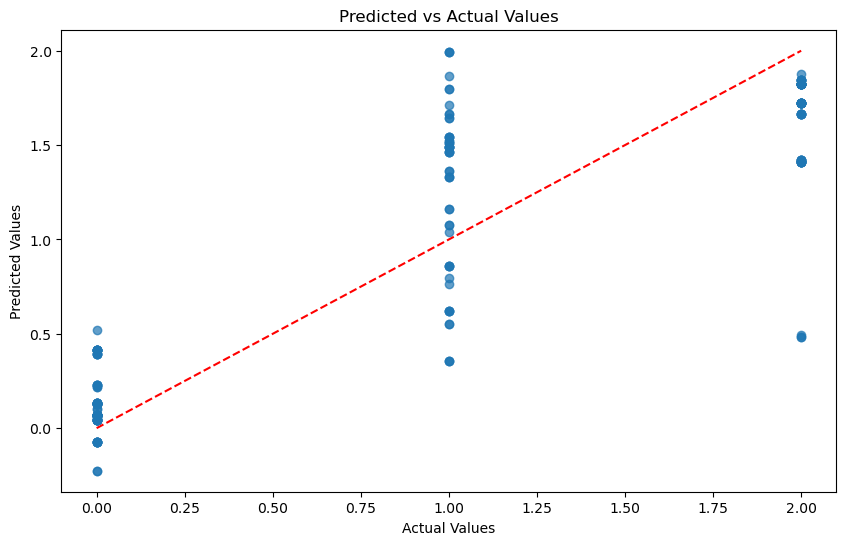

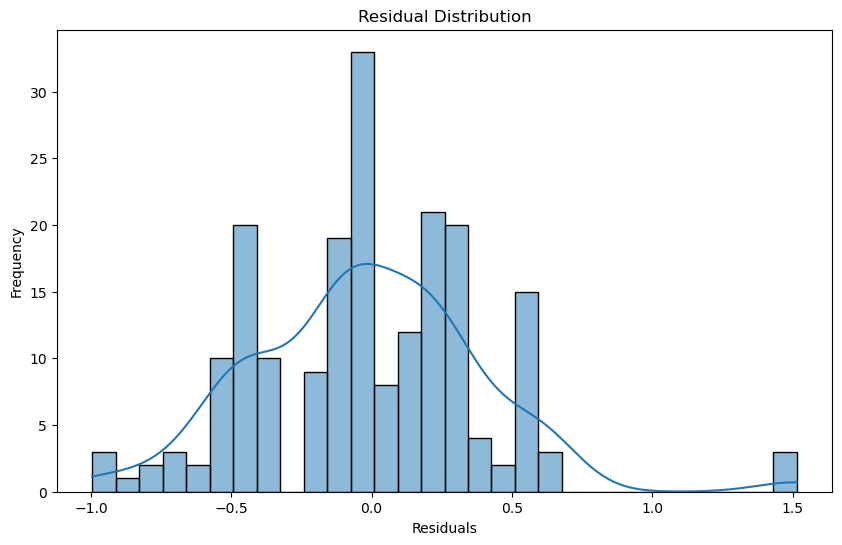

In [41]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Feature selection based on correlation and domain knowledge
# Filter features based on threshold correlation with the target variable
target_variable = 'Level'  # Replace with the actual target column name
correlation_threshold = 0.2

correlations = df.corr()[target_variable].abs()
selected_features = correlations[correlations > correlation_threshold].index.tolist()
selected_features.remove(target_variable)  # Exclude the target variable itself
print("\nSelected Features Based on Correlation:")
print(selected_features)

# Separate features and target variable
X = df[selected_features]
y = df[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Split:")
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

# Data Preprocessing: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("\nLinear Regression Model Trained Successfully.")

# Model Evaluation
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
